Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### Load Data

In [3]:
movies = pd.read_csv('data/MoviesOnStreamingPlatforms_updated.csv', index_col=0)
tv = pd.read_csv('data/tv_shows.csv', index_col=0)

Colour Scheme per Streaming Platform

In [4]:
n_col = '#ff6961'  #'#e50914' # red
h_col = '#77DD77'  #'#1ce783' # green
d_col = '#26abff'  #'#113CCF' # blue
p_col = '#FFB347'  #'#FF9900' # orange

### Check Data of MOVIES

In [9]:
movies.head()
movies.describe()
movies.isnull().sum()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


,ID,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.701457,20.155280,0.212613,0.053930,0.737817,0.033684,0.0,93.250557
std,4833.720789,20.674321,1.703681,33.626192,0.409169,0.225886,0.439835,0.180419,0.0,25.954224
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,4.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,38.000000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,100.000000,1.000000,1.000000,1.000000,1.000000,0.0,410.000000


ID                   0
Title                0
Year                 0
Age                  0
IMDb                 0
Rotten Tomatoes      0
Netflix              0
Hulu                 0
Prime Video          0
Disney+              0
Type                 0
Directors          726
Genres             275
Country            435
Language           599
Runtime            592
dtype: int64

Data Cleaning - NaN

In [6]:
movies.Age = movies.Age.fillna('Unknown')
movies.IMDb = movies.IMDb.fillna(0)
movies['Rotten Tomatoes'] = movies['Rotten Tomatoes'].str.rstrip('%').astype('float') # get rid of the % symbol
movies['Rotten Tomatoes'] = movies['Rotten Tomatoes'].fillna(0)

Runtime 1256 min?

In [7]:
#movies[movies.Runtime > 300]

In [8]:
movies.loc[movies.Title == 'Law of the Lawless', ['Runtime']] = 87 # obtained from imdb look up for these >300 min movies
movies.loc[movies.Title == 'Scarlett', ['Runtime']] = 92
movies.loc[movies.Title == 'Carlos el terrorista', ['Runtime']] = 97
movies.loc[movies.Title == 'Colorado', ['Runtime']] = 57
movies.loc[movies.Title == 'The Inner Circle', ['Runtime']] = 96
# Custer's Last Stand actually is 328 min
# The Vatican Museums actually is 410 min

### Check Data of TV

In [12]:
tv.head()
tv.describe()
tv.isnull().sum()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96.0,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93.0,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91.0,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78.0,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97.0,1,0,0,0,1


,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
count,5611.000000,5611.000000,5611.00000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2011.021030,5.641419,13.96489,0.344145,0.312600,0.382107,0.032080,1.0
std,11.005116,3.053045,31.04382,0.475131,0.463594,0.485946,0.176228,0.0
min,1901.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2010.000000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2015.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2017.000000,7.700000,0.00000,1.000000,1.000000,1.000000,0.000000,1.0
max,2020.000000,9.600000,100.00000,1.000000,1.000000,1.000000,1.000000,1.0


Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
type               0
dtype: int64

Data Cleaning - NaN

In [11]:
tv.Age = tv.Age.fillna('Unknown')
tv.IMDb = tv.IMDb.fillna(0)
tv['Rotten Tomatoes'] = tv['Rotten Tomatoes'].str.rstrip('%').astype('float') # get rid of the % symbol
tv['Rotten Tomatoes'] = tv['Rotten Tomatoes'].fillna(0)

### Streaming Platform Breakdown

In [13]:
#Creating different dataframes for each platform FOR EACH SERVICE TYPE (movies or tv)
Hulu_movies = movies.loc[(movies['Hulu'] > 0) ]
Disney_movies = movies.loc[(movies['Disney+'] > 0) ]
Prime_movies = movies.loc[(movies['Prime Video'] > 0)  ]
Netflix_movies = movies.loc[(movies['Netflix'] > 0)  ]
Hulu_tv = tv.loc[(tv['Hulu'] > 0) ]
Disney_tv = tv.loc[(tv['Disney+'] > 0) ]
Prime_tv = tv.loc[(tv['Prime Video'] > 0)  ]
Netflix_tv = tv.loc[(tv['Netflix'] > 0)  ]

## Who has the biggest catalog?

In [24]:
def donut(i,df,sizes,title):
    plt.subplot(i)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=0)

    #centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    #fig.gca().add_artist(centre_circle)
    plt.title(title, fontsize=20)
    plt.rcParams['font.size'] = 15
    plt.axis('equal')

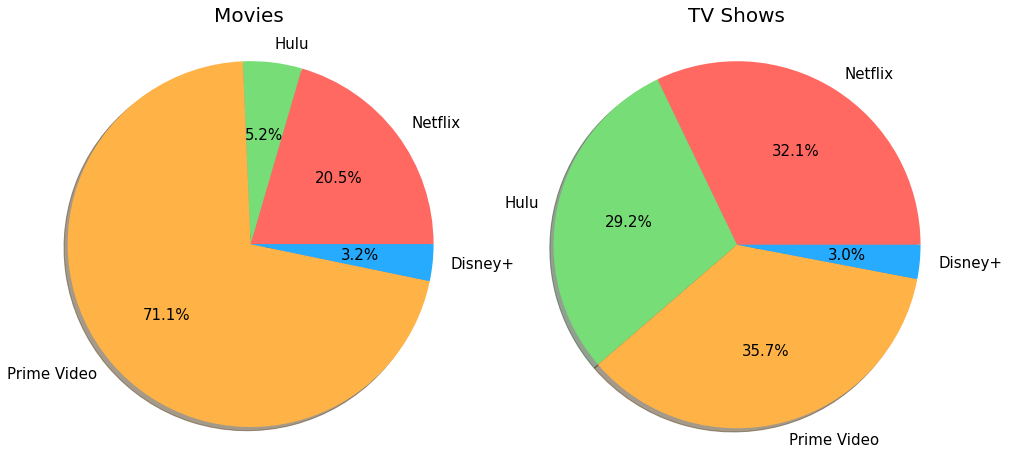

In [25]:
def val_sum(df,c):
    return df[c].sum(axis=0)

val_counts = []
dfs = [movies,tv]
cols = ['Netflix','Hulu','Prime Video','Disney+']

for x in dfs:
    for y in cols:
        val_counts.append(val_sum(x,y))

fig = plt.subplots(figsize=(16, 8))
labels = 'Netflix', 'Hulu','Prime Video','Disney+'
sizes1 = [val_counts[0], val_counts[1],val_counts[2],val_counts[3]]
sizes2 = [val_counts[4], val_counts[5],val_counts[6],val_counts[7]]
colors = [n_col, h_col, p_col, d_col]
explode = (0, 0, 0, 0) 

donut(121,movies,sizes1,'Movies')
donut(122,tv,sizes2,'TV Shows')
plt.show()
#plt.savefig('../images/Count_per_platform_pie.png')

Can we evaluate the 'unique' movies/tv shows to each platform?

In [46]:
tv.groupby(['Netflix','Hulu','Prime Video','Disney+']).count()

180

## Release year breakdown of movies and TV shows in each catalog? 

In [61]:
def kde(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.kdeplot(data=dataframe['Runtime'], color=colors[c],shade=True)
    plt.xlabel('Movie Runtime (minutes)', fontsize = 15)
    plt.xlim(0,200)
    plt.ylim(0,.03)
    plt.subplot(i+1)
    sns.kdeplot(data=dataframe['Year'], color=colors[c],shade=True)
    plt.xlabel('Movie Release Year', fontsize = 15)
    plt.xlim(1900,2040)
    plt.ylim(0,0.12)
    plt.rcParams['font.size'] = 12
    plt.legend([platform], fontsize = 15, bbox_to_anchor=(1.02,.9), loc="upper left");

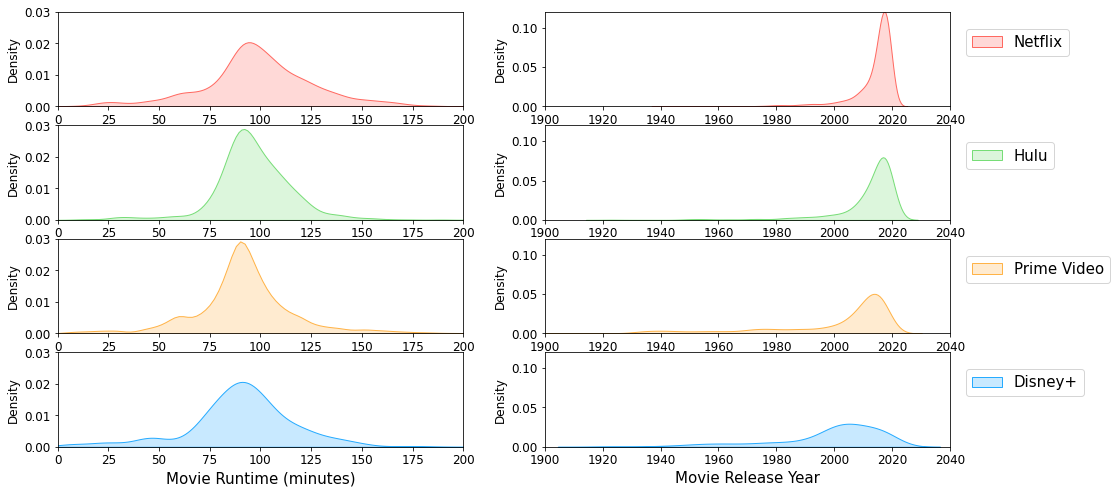

In [62]:
plt.figure(figsize = (16, 8));

kde(421,movies,'Netflix',0);
kde(423,movies,'Hulu',1);
kde(425,movies,'Prime Video',2);
kde(427,movies,'Disney+',3);

In [138]:
def kdetv(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.kdeplot(data=dataframe['Year'], color=colors[c],shade=True)
    plt.xlabel('TV Series Release Year', fontsize = 15)
    plt.xlim(1960,2030)
    plt.ylim(0,0.12)
    plt.legend([platform], fontsize = 15, bbox_to_anchor=(1.02,.9), loc="upper left");

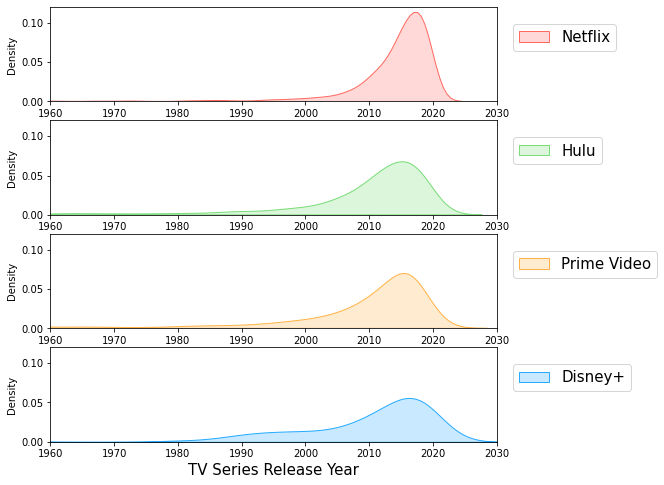

In [139]:
plt.figure(figsize = (8, 8));

kdetv(411,tv,'Netflix',0);
kdetv(412,tv,'Hulu',1);
kdetv(413,tv,'Prime Video',2);
kdetv(414,tv,'Disney+',3);

## What are the popular genres in each catalog?

In [64]:
#creating helper function that receives a column and returns a new dataframe 
#containing bolean values for each possible option 

def split_multicolumn(genres):
    result_df = genres.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in genres[genres.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

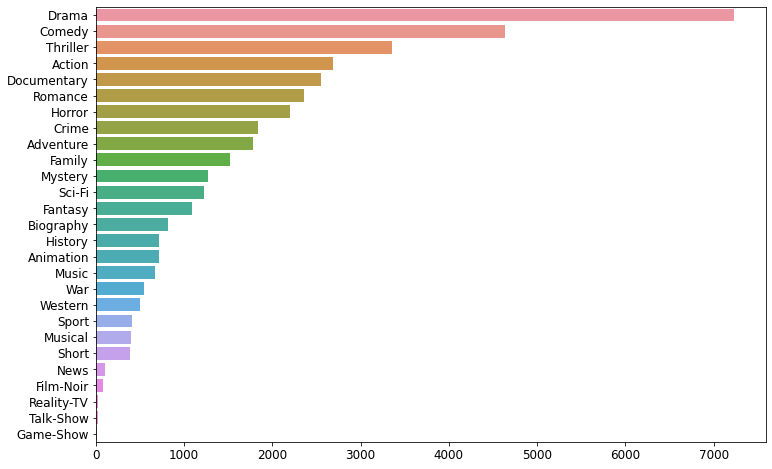

In [67]:
#performing a sum operation of all True values
movie_genres = mGenres.sum().sort_values(ascending=False)

#plotting into a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x=movie_genres.values, y=movie_genres.index);

In [68]:
genre_col = movie_genres.index.tolist()

In [66]:
mGenres = split_multicolumn(movies.Genres)
Hulu_mG = Hulu_movies.join(mGenres)
Netflix_mG = Netflix_movies.join(mGenres)
Prime_mG = Prime_movies.join(mGenres)
Disney_mG = Disney_movies.join(mGenres)

In [99]:
Hulu_mG.sum()

Drama          438
Comedy         272
Thriller       221
Action         129
Documentary    132
Romance        151
Horror         124
Crime          100
Adventure      111
Family         105
Mystery         86
Sci-Fi          86
Fantasy         77
Biography       58
History         38
Animation       75
Music           36
War             25
Western         25
Sport           27
Musical         15
Short            9
News             5
Film-Noir        1
Reality-TV       2
Talk-Show        1
Game-Show        1
dtype: int64

In [102]:
Hulu_mG = Hulu_mG[genre_col]
Netflix_mG = Netflix_mG[genre_col]
Prime_mG = Prime_mG[genre_col]
Disney_mG = Disney_mG[genre_col]

#since each dataframe above contains only boolean values, now we can use sum() to find
#the quantities for each platform and save it into a new variable we will use in our barplot:
hulu_genres_list = Hulu_mG.sum().sort_values(ascending=False).head(10)/sum(Hulu_mG.sum())*100
netflix_genres_list = Netflix_mG.sum().sort_values(ascending=False).head(10)/sum(Netflix_mG.sum())*100
primevideo_genres_list = Prime_mG.sum().sort_values(ascending=False).head(10)/sum(Prime_mG.sum())*100
disney_genres_list = Disney_mG.sum().sort_values(ascending=False).head(10)/sum(Disney_mG.sum())*100

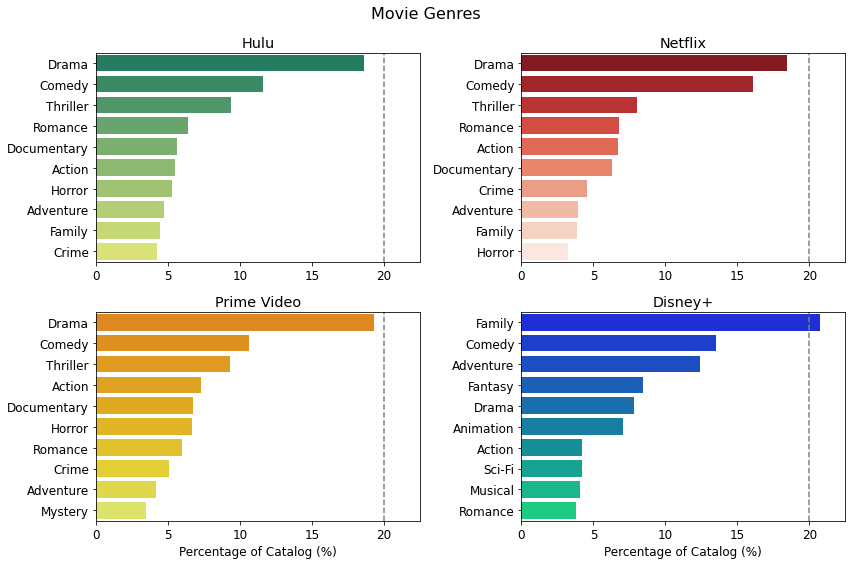

In [119]:
#creating subplots to show each data into a different ax
fix, axes = plt.subplots(2,2, figsize=(12,8));

#setting titles
axes[0,0].set_title('Hulu');
axes[0,0].set_xlim(0,22.5);
axes[0,1].set_title('Netflix');
axes[0,1].set_xlim(0,22.5);
axes[1,0].set_title('Prime Video');
axes[1,0].set_xlim(0,22.5);
axes[1,0].set_xlabel('Percentage of Catalog (%)');
axes[1,1].set_title('Disney+');
axes[1,1].set_xlim(0,22.5);
axes[1,1].set_xlabel('Percentage of Catalog (%)');
fix.suptitle('Movie Genres', fontsize=16)
#plotting the four barplots using seaborn
sns.barplot(y=hulu_genres_list.index, x=hulu_genres_list.values, ax=axes[0,0],palette='summer');
axes[0,0].axvline(20, color='grey', linestyle='--')
sns.barplot(y=netflix_genres_list.index, x=netflix_genres_list.values, ax=axes[0,1], palette='Reds_r');
axes[0,1].axvline(20, color='grey', linestyle='--')
sns.barplot(y=primevideo_genres_list.index, x=primevideo_genres_list.values, ax=axes[1,0], palette='Wistia_r');
axes[1,0].axvline(20, color='grey', linestyle='--')
sns.barplot(y=disney_genres_list.index, x=disney_genres_list.values, ax=axes[1,1], palette='winter');
plt.tight_layout();
axes[1,1].axvline(20, color='grey', linestyle='--')
plt.show();

## IMDb and Rotten Tomatoes Scoring per platform?

In [47]:
Hulu_mIMDb = Hulu_movies.loc[Hulu_movies['IMDb']>0]
Netflix_mIMDb = Netflix_movies.loc[Netflix_movies['IMDb']>0]
Prime_mIMDb = Prime_movies.loc[Prime_movies['IMDb']>0]
Disney_mIMDb = Disney_movies.loc[Disney_movies['IMDb']>0]

Hulu_mRotten = Hulu_movies.loc[Hulu_movies['Rotten Tomatoes']>0]
Netflix_mRotten = Netflix_movies.loc[Netflix_movies['Rotten Tomatoes']>0]
Prime_mRotten = Prime_movies.loc[Prime_movies['Rotten Tomatoes']>0]
Disney_mRotten = Disney_movies.loc[Disney_movies['Rotten Tomatoes']>0]

Hulu_tvIMDb = Hulu_tv.loc[Hulu_tv['IMDb']>0]
Netflix_tvIMDb = Netflix_tv.loc[Netflix_tv['IMDb']>0]
Prime_tvIMDb = Prime_tv.loc[Prime_tv['IMDb']>0]
Disney_tvIMDb = Disney_tv.loc[Disney_tv['IMDb']>0]

Hulu_tvRotten = Hulu_tv.loc[Hulu_tv['Rotten Tomatoes']>0]
Netflix_tvRotten = Netflix_tv.loc[Netflix_tv['Rotten Tomatoes']>0]
Prime_tvRotten = Prime_tv.loc[Prime_tv['Rotten Tomatoes']>0]
Disney_tvRotten = Disney_tv.loc[Disney_tv['Rotten Tomatoes']>0]

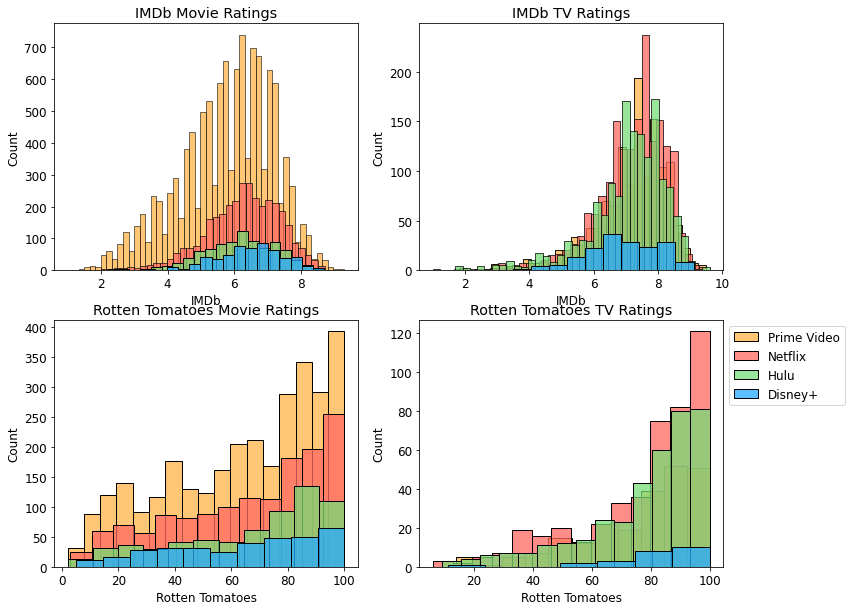

In [48]:
#Defining plot size and title
fig,ax = plt.subplots(2,2, figsize=(12,10))

ax[0,0].set_title('IMDb Movie Ratings');
ax[0,1].set_title('IMDb TV Ratings');
ax[1,0].set_title('Rotten Tomatoes Movie Ratings');
ax[1,1].set_title('Rotten Tomatoes TV Ratings');

#Plotting the information from each dataset into a KDE plot
sns.histplot(data=Prime_mIMDb['IMDb'], color=p_col, ax=ax[0,0]);
sns.histplot(data=Netflix_mIMDb['IMDb'], color=n_col,  ax=ax[0,0]);
sns.histplot(data=Hulu_mIMDb['IMDb'], color=h_col,  ax=ax[0,0]);
sns.histplot(data=Disney_mIMDb['IMDb'], color=d_col, ax=ax[0,0]);

sns.histplot(data=Prime_mRotten['Rotten Tomatoes'], color=p_col, ax=ax[1,0]);
sns.histplot(data=Netflix_mRotten['Rotten Tomatoes'], color=n_col,  ax=ax[1,0]);
sns.histplot(data=Hulu_mRotten['Rotten Tomatoes'], color=h_col,  ax=ax[1,0]);
sns.histplot(data=Disney_mRotten['Rotten Tomatoes'], color=d_col, ax=ax[1,0]);

sns.histplot(data=Prime_tvIMDb['IMDb'], color=p_col, legend=True, ax=ax[0,1]);
sns.histplot(data=Netflix_tvIMDb['IMDb'], color=n_col,  legend=True, ax=ax[0,1]);
sns.histplot(data=Hulu_tvIMDb['IMDb'], color=h_col,  legend=True, ax=ax[0,1]);
sns.histplot(data=Disney_tvIMDb['IMDb'], color=d_col, legend=True, ax=ax[0,1]);

sns.histplot(data=Prime_tvRotten['Rotten Tomatoes'], color=p_col, ax=ax[1,1]);
sns.histplot(data=Netflix_tvRotten['Rotten Tomatoes'], color=n_col, ax=ax[1,1]);
sns.histplot(data=Hulu_tvRotten['Rotten Tomatoes'], color=h_col, ax=ax[1,1]);
sns.histplot(data=Disney_tvRotten['Rotten Tomatoes'], color=d_col, ax=ax[1,1]);

#Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'], bbox_to_anchor=(1,1));
plt.show();

In [54]:
# average for reference of above
print('IMDb - Movies')
print('Prime',round(Prime_mIMDb['IMDb'].mean(),2))
print('Netflix',round(Netflix_mIMDb['IMDb'].mean(),2))
print('Hulu',round(Hulu_mIMDb['IMDb'].mean(),2))
print('Disney+',round(Disney_mIMDb['IMDb'].mean(),2))
print('Rotten Tomatoes - Movies')
print('Prime',round(Prime_mRotten['Rotten Tomatoes'].mean(),2))
print('Netflix',round(Netflix_mRotten['Rotten Tomatoes'].mean(),2))
print('Hulu',round(Hulu_mRotten['Rotten Tomatoes'].mean(),2))
print('Disney',round(Disney_mRotten['Rotten Tomatoes'].mean(),2))
print('IMDb - TV')
print('Prime',round(Prime_tvIMDb['IMDb'].mean(),2))
print('Netflix',round(Netflix_tvIMDb['IMDb'].mean(),2))
print('Hulu',round(Hulu_tvIMDb['IMDb'].mean(),2))
print('Disney',round(Disney_tvIMDb['IMDb'].mean(),2))
print('Rotten Tomatoes - TV')
print('Prime',round(Prime_tvRotten['Rotten Tomatoes'].mean(),2))
print('Netflix',round(Netflix_tvRotten['Rotten Tomatoes'].mean(),2))
print('Hulu',round(Hulu_tvRotten['Rotten Tomatoes'].mean(),2))
print('Disney',round(Disney_tvRotten['Rotten Tomatoes'].mean(),2))

IMDb - Movies
Prime 5.77
Netflix 6.25
Hulu 6.15
Disney+ 6.44
Rotten Tomatoes - Movies
Prime 64.34
Netflix 66.2
Hulu 66.87
Disney 64.26
IMDb - TV
Prime 7.18
Netflix 7.16
Hulu 7.06
Disney 6.92
Rotten Tomatoes - TV
Prime 76.82
Netflix 77.96
Hulu 78.04
Disney 81.25


High Rating

In [56]:
pd.options.display.max_columns = None
movies.groupby('Disney+').describe()

ID                                                      \
           count          mean          std   min       25%      50%   
Disney+                                                                
0        16180.0   8113.489679  4679.579748   1.0   4060.75   8116.5   
1          564.0  15802.973404  2882.394425  96.0  16321.75  16462.5   

                               Year                                          \
              75%      max    count         mean        std     min     25%   
Disney+                                                                       
0        12166.25  16212.0  16180.0  2003.194747  20.692145  1902.0  2001.0   
1        16603.25  16744.0    564.0  1997.829787  19.471419  1921.0  1993.0   

                                    IMDb                                     \
            50%     75%     max    count      mean       std  min  25%  50%   
Disney+                                                                       
0        2012.0  2016.0  2020.0  16180.0  5.676063  1.716083  0.0  4.9  6.0   
1        2003.0  2011.0  2020.0    564.0  6.429965  1.067078  0.0  5.8  6.5   

                  Rotten Tomatoes                                              \
         75%  max           count       mean        std  min  25%   50%   75%   
Disney+                                                                         
0        6.8  9.3         16180.0  19.487763  33.292073  0.0  0.0   0.0  33.0   
1        7.2  8.7           564.0  39.304965  37.350853  0.0  0.0  36.5  76.0   

                Netflix                                                  Hulu  \
           max    count      mean       std  min  25%  50%  75%  max    count   
Disney+                                                                         
0        100.0  16180.0  0.219407  0.413857  0.0  0.0  0.0  0.0  1.0  16180.0   
1        100.0    564.0  0.017730  0.132087  0.0  0.0  0.0  0.0  1.0    564.0   

                                                     Prime Video            \
             mean       std  min  25%  50%  75%  max       count      mean   
Disney+                                                                      
0        0.055377  0.228722  0.0  0.0  0.0  0.0  1.0     16180.0  0.762361   
1        0.012411  0.110811  0.0  0.0  0.0  0.0  1.0       564.0  0.033688   

                                               Type                           \
              std  min  25%  50%  75%  max    count mean  std  min  25%  50%   
Disney+                                                                        
0        0.425650  0.0  1.0  1.0  1.0  1.0  16180.0  0.0  0.0  0.0  0.0  0.0   
1        0.180585  0.0  0.0  0.0  0.0  1.0    564.0  0.0  0.0  0.0  0.0  0.0   

                   Runtime                                                \
         75%  max    count       mean        std  min   25%   50%    75%   
Disney+                                                                    
0        0.0  0.0  15597.0  93.351093  25.939919  1.0  83.0  92.0  104.0   
1        0.0  0.0    555.0  90.425225  26.219349  2.0  79.0  91.0  104.0   

                
           max  
Disney+         
0        410.0  
1        181.0

In [123]:
Hulu_mIMDb = Hulu_movies.loc[Hulu_movies['IMDb']>=8]
Netflix_mIMDb = Netflix_movies.loc[Netflix_movies['IMDb']>=8]
Prime_mIMDb = Prime_movies.loc[Prime_movies['IMDb']>=8]
Disney_mIMDb = Disney_movies.loc[Disney_movies['IMDb']>=8]

Hulu_mRotten = Hulu_movies.loc[Hulu_movies['Rotten Tomatoes']>=80]
Netflix_mRotten = Netflix_movies.loc[Netflix_movies['Rotten Tomatoes']>=80]
Prime_mRotten = Prime_movies.loc[Prime_movies['Rotten Tomatoes']>=80]
Disney_mRotten = Disney_movies.loc[Disney_movies['Rotten Tomatoes']>=80]

Hulu_tvIMDb = Hulu_tv.loc[Hulu_tv['IMDb']>=8]
Netflix_tvIMDb = Netflix_tv.loc[Netflix_tv['IMDb']>=8]
Prime_tvIMDb = Prime_tv.loc[Prime_tv['IMDb']>=8]
Disney_tvIMDb = Disney_tv.loc[Disney_tv['IMDb']>=8]

Hulu_tvRotten = Hulu_tv.loc[Hulu_tv['Rotten Tomatoes']>=80]
Netflix_tvRotten = Netflix_tv.loc[Netflix_tv['Rotten Tomatoes']>=80]
Prime_tvRotten = Prime_tv.loc[Prime_tv['Rotten Tomatoes']>=80]
Disney_tvRotten = Disney_tv.loc[Disney_tv['Rotten Tomatoes']>=80]

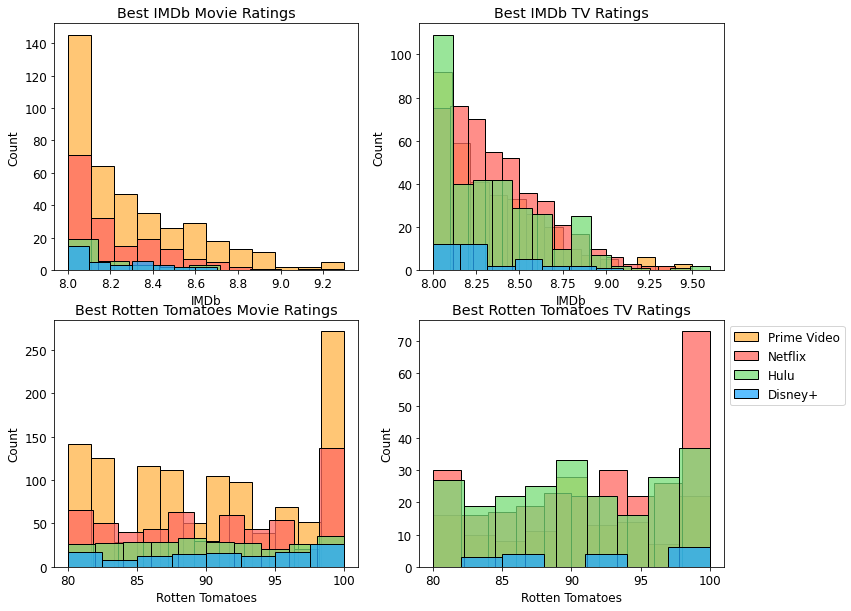

In [124]:
#Defining plot size and title
fig,ax = plt.subplots(2,2, figsize=(12,10))

ax[0,0].set_title('Best IMDb Movie Ratings');
ax[0,1].set_title('Best IMDb TV Ratings');
ax[1,0].set_title('Best Rotten Tomatoes Movie Ratings');
ax[1,1].set_title('Best Rotten Tomatoes TV Ratings');

#Plotting the information from each dataset into a KDE plot
sns.histplot(data=Prime_mIMDb['IMDb'], color=p_col, ax=ax[0,0]);
sns.histplot(data=Netflix_mIMDb['IMDb'], color=n_col,  ax=ax[0,0]);
sns.histplot(data=Hulu_mIMDb['IMDb'], color=h_col,  ax=ax[0,0]);
sns.histplot(data=Disney_mIMDb['IMDb'], color=d_col, ax=ax[0,0]);

sns.histplot(data=Prime_mRotten['Rotten Tomatoes'], color=p_col, ax=ax[1,0]);
sns.histplot(data=Netflix_mRotten['Rotten Tomatoes'], color=n_col,  ax=ax[1,0]);
sns.histplot(data=Hulu_mRotten['Rotten Tomatoes'], color=h_col,  ax=ax[1,0]);
sns.histplot(data=Disney_mRotten['Rotten Tomatoes'], color=d_col, ax=ax[1,0]);

sns.histplot(data=Prime_tvIMDb['IMDb'], color=p_col, legend=True, ax=ax[0,1]);
sns.histplot(data=Netflix_tvIMDb['IMDb'], color=n_col,  legend=True, ax=ax[0,1]);
sns.histplot(data=Hulu_tvIMDb['IMDb'], color=h_col,  legend=True, ax=ax[0,1]);
sns.histplot(data=Disney_tvIMDb['IMDb'], color=d_col, legend=True, ax=ax[0,1]);

sns.histplot(data=Prime_tvRotten['Rotten Tomatoes'], color=p_col, ax=ax[1,1]);
sns.histplot(data=Netflix_tvRotten['Rotten Tomatoes'], color=n_col, ax=ax[1,1]);
sns.histplot(data=Hulu_tvRotten['Rotten Tomatoes'], color=h_col, ax=ax[1,1]);
sns.histplot(data=Disney_tvRotten['Rotten Tomatoes'], color=d_col, ax=ax[1,1]);

#Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'], bbox_to_anchor=(1,1));
plt.show();

## Age of Audience Suggested?

In [125]:
hulu_mages = Hulu_movies.Age.value_counts().drop('Unknown')
netflix_mages = Netflix_movies.Age.value_counts().drop('Unknown')
primevideo_mages = Prime_movies.Age.value_counts().drop('Unknown')
disney_mages = Disney_movies.Age.value_counts().drop('Unknown')

hulu_tvages = Hulu_tv.Age.value_counts().drop('Unknown')
netflix_tvages = Netflix_tv.Age.value_counts().drop('Unknown')
primevideo_tvages = Prime_tv.Age.value_counts().drop('Unknown')
disney_tvages = Disney_tv.Age.value_counts().drop('Unknown')

In [126]:
hulu_mages

18+    290
13+    119
7+     109
all     55
16+     17
Name: Age, dtype: int64

In [127]:
df_list = [hulu_mages,netflix_mages,primevideo_mages,disney_mages,hulu_tvages,netflix_tvages,primevideo_tvages,disney_tvages]
for i in df_list:
    i.loc[i['Age'] == '18+', ['Age']] = 'NC-17'
    i.loc[i['Age'] == '7+', ['Age']] = 'PG'
    i.loc[i['Age'] == '13+', ['Age']] = 'PG-13'
    i.loc[i['Age'] == 'all', ['Age']] = 'G'
    i.loc[i['Age'] == '16+', ['Age']] = 'R'

KeyError: 'Age'

* **G – General Audiences** - All ages admitted. 
* **PG – Parental Guidance Suggested** - Some material may not be suitable for children. (7+)
* **PG-13 – Parents Strongly Cautioned** - Some material may be inappropriate for children under 13. (13+)
* **R – Restricted** - Under 17 requires accompanying parent or adult guardian. (16+)
* **NC-17 – Adults Only** - No One 17 and Under Admitted. (18+)

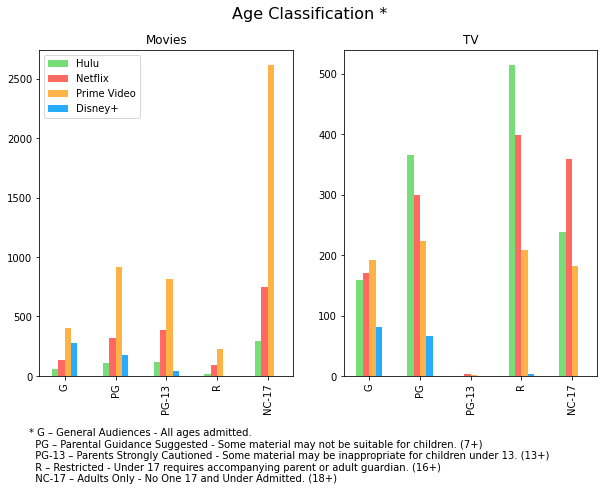

In [327]:
x = ['G','PG','PG-13','R','NC-17']

#is this the best code? NO. But it will work in a pinch for this one purpose **only**...
hulu_mov = [55,109,119,17,290]
net_mov = [130,323,383,89,752]
prim_mov = [406,916,819,226,2612]
dis_mov = [277,179,40,1,3]

hulu_tv = [159,365,0,514,239]
net_tv = [171,300,3,398,359]
prim_tv = [192,224,1,209,182]
dis_tv = [81,66,0,3,0]

mov_age = pd.DataFrame([['G',55,130,406,277],['PG',109,323,916,179],['PG-13',119,383,819,40],['R',17,89,226,1],['NC-17',290,752,2612,3]],
                      columns=['Rating','Hulu','Netflix','Prime Video','Disney+'])

tv_age = pd.DataFrame([['G',159,171,192,81],['PG',365,300,224,66],['PG-13',0,3,1,0],['R',514,398,209,3],['NC-17',239,359,182,0]],
                      columns=['Rating','Hulu','Netflix','Prime Video','Disney+'])

colors = [h_col, n_col, p_col, d_col]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6));
mov_age.plot(x='Rating', ax=axes[0], kind='bar', title='Movies', color=colors);
tv_age.plot(x='Rating', ax=axes[1], kind='bar', title='TV', color=colors, legend=False);
fig.suptitle('Age Classification *', fontsize=16);
axes[0].set_xlabel('');
axes[1].set_xlabel('');

# annotations
fig.text(0.11, -.12, '* G – General Audiences - All ages admitted.\n  PG – Parental Guidance Suggested - Some material may not be suitable for children. (7+)\n  PG-13 – Parents Strongly Cautioned - Some material may be inappropriate for children under 13. (13+)\n  R – Restricted - Under 17 requires accompanying parent or adult guardian. (16+)\n  NC-17 – Adults Only - No One 17 and Under Admitted. (18+)', ha='left');

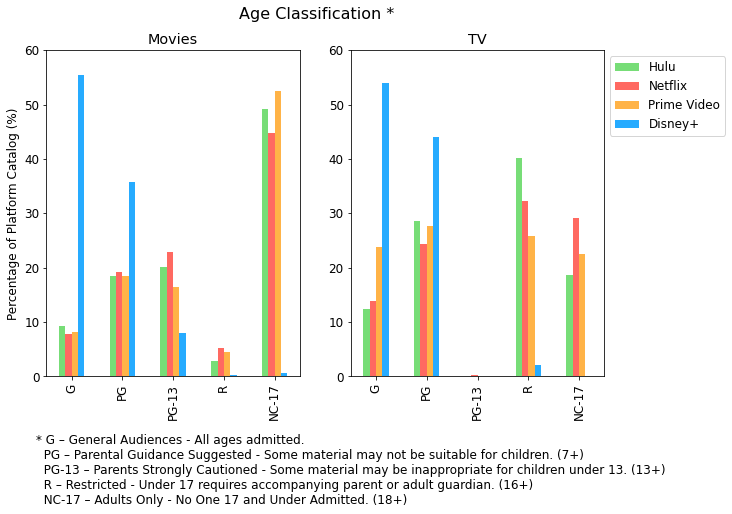

In [141]:
x = ['G','PG','PG-13','R','NC-17']

mov_age = pd.DataFrame([['G',55/590*100,130/1677*100,406/4979*100,277/500*100],
                        ['PG',109/590*100,323/1677*100,916/4979*100,179/500*100],
                        ['PG-13',119/590*100,383/1677*100,819/4979*100,40/500*100],
                        ['R',17/590*100,89/1677*100,226/4979*100,1/500*100],
                        ['NC-17',290/590*100,752/1677*100,2612/4979*100,3/500*100]],
                      columns=['Rating','Hulu','Netflix','Prime Video','Disney+'])

tv_age = pd.DataFrame([['G',159/1277*100,171/1231*100,192/808*100,81/150*100],
                       ['PG',365/1277*100,300/1231*100,224/808*100,66/150*100],
                       ['PG-13',0/1277*100,3/1231*100,1/808*100,0/150*100],
                       ['R',514/1277*100,398/1231*100,209/808*100,3/150*100],
                       ['NC-17',239/1277*100,359/1231*100,182/808*100,0/150*100]],
                      columns=['Rating','Hulu','Netflix','Prime Video','Disney+'])

colors = [h_col, n_col, p_col, d_col]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6));
mov_age.plot(x='Rating', ax=axes[0], kind='bar', title='Movies', color=colors, legend=False);
tv_age.plot(x='Rating', ax=axes[1], kind='bar', title='TV', color=colors, legend=False);
fig.suptitle('Age Classification *', fontsize=16);
plt.legend(bbox_to_anchor=(1.5, 1))
axes[0].set_xlabel('');
axes[0].set_ylabel('Percentage of Platform Catalog (%)');
axes[0].set_ylim(0,60);
axes[1].set_ylim(0,60);
axes[1].set_xlabel('');

# annotations
fig.text(0.11, -.17, '* G – General Audiences - All ages admitted.\n  PG – Parental Guidance Suggested - Some material may not be suitable for children. (7+)\n  PG-13 – Parents Strongly Cautioned - Some material may be inappropriate for children under 13. (13+)\n  R – Restricted - Under 17 requires accompanying parent or adult guardian. (16+)\n  NC-17 – Adults Only - No One 17 and Under Admitted. (18+)', ha='left');

### Pricing

In [328]:
# Canada 2021 Pricing
netflix = {'basic':9.99,'standard':14.99,'premium':16.99}
hulu = {'With Ads':5.99,'Ad-Free':11.99, 'Live TV':54.99}
prime = {'Monthly':7.99,'Prime/Year':79}
disney = {'Monthly':11.99}